In [30]:
import sys
from pathlib import Path
current_path = Path.cwd()
target_path = current_path.parents[0] 
print(target_path)
sys.path.insert(0, str(target_path))
from plot_parameters import remove_ticks

import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import welch

c:\Users\nicol\Documents\00Research\PythonCode\ReadoutDesigner


1638.2


([<matplotlib.axis.XTick at 0x1914398ee50>,
 [Text(0, 0, '$\\omega_b-\\omega_s$'),
  Text(0, 0, '$\\omega$'),
  Text(0, 0, '$\\omega_b + \\omega_s$')])

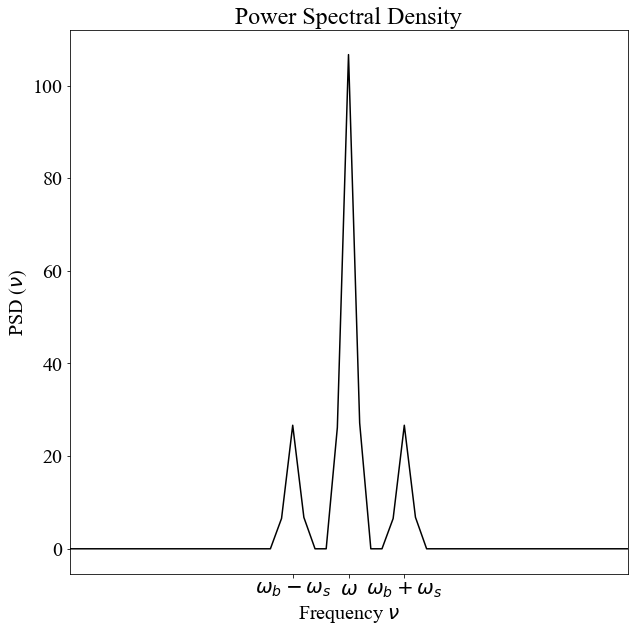

In [31]:
# plot amplitude modulation
# setup time, a random signal and a carrier
time = np.linspace(0, 5, 512*4*4) # seconds

#signal
f_signal = 1 # Hz
omega_signal = 2*np.pi * f_signal
signal = np.sin(omega_signal * time)
# bolo response-ish
conductivity = (1 + signal)

# carrier
f_carrier = 10 # Hz
omega_b = 2*np.pi * f_carrier
carrier_amp = 8
carrier = carrier_amp * np.sin(omega_b * time)

total_current = carrier * conductivity

# Plot things in frequency space
# Compute the Power Spectral Density
fs = (time[1] - time[0])**(-1)
f, Pxx = welch(total_current, fs, nperseg=1024*4*2)

print(fs)

# Plotting the PSD
plt.figure(figsize=(10, 10))
plt.plot(f, Pxx, color='k')
#remove_ticks()
plt.xlabel('Frequency $\\nu$')
plt.ylabel('PSD ($\\nu$)')
plt.title('Power Spectral Density')
#plt.grid(True)
plt.xlim([6, 14])
x_values = [f_carrier-f_signal, f_carrier, f_carrier+f_signal]
plt.xticks(x_values,["$\\omega_b-\\omega_s$", "$\\omega$", "$\\omega_b + \\omega_s$"])
#plt.tick_params(axis='both', labelsize=13)


Text(0, 0.5, 'Modulated signal')

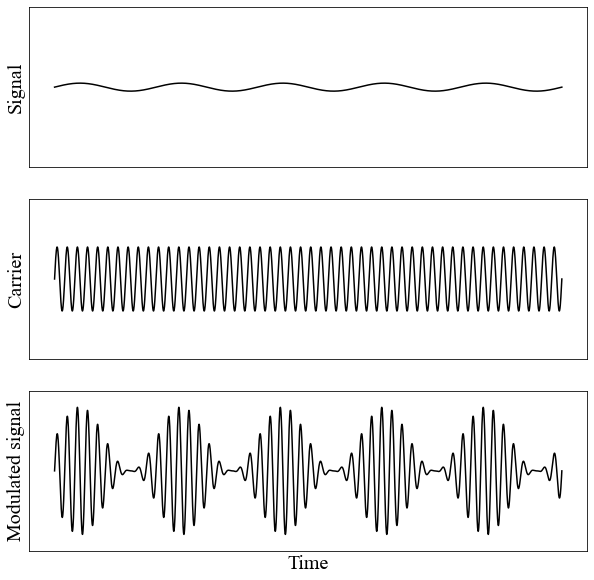

In [32]:
#plot
plt.figure(1, figsize=(10, 10))
ylim = [-20, 20]

plt.subplot(3, 1, 1)
plt.plot(time, signal, color='k')
plt.ylim(ylim)
remove_ticks()
plt.ylabel("Signal")

plt.subplot(3, 1, 2)
plt.plot(time, carrier, color='k')
plt.ylim(ylim)
remove_ticks()
plt.ylabel("Carrier")

plt.subplot(3, 1, 3)
plt.plot(time, total_current, color='k')
#plt.plot(time, signal + carrier_amp, '--', color='k', linewidth=0.8)
#plt.plot(time, signal - carrier_amp,  '--', color='k', linewidth=0.8)
plt.ylim(ylim)
remove_ticks()
plt.xlabel("Time")
plt.ylabel("Modulated signal")